### Project 1 - Group 2

### Project Title: FIFA Soccer Analysis – insights into European clubs and their players from 2015 to 2021

### Team Members:

###  * Sandhalie Fernando
###  * Cassie Guo
###  * Sandy Berahim
###  * Graham Meadon


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# FIFA data files
FIFA_players_2017_path = "./data/players_17.csv"
FIFA_players_2021_path = "./data/players_21.csv"


# Read the FIFA Players data
FIFA_players_2017_metadata = pd.read_csv(FIFA_players_2017_path)
FIFA_players_2021_metadata = pd.read_csv(FIFA_players_2021_path)


# Combine the data into a single dataset
combined_original_data_df = pd.merge(FIFA_players_2017_metadata, FIFA_players_2021_metadata, on = "sofifa_id", how = "outer", suffixes =("_2017","_2021"))


# Display the data table for preview
combined_original_data_df.head()



,sofifa_id,short_name_2017,long_name_2017,age_2017,dob_2017,height_cm_2017,weight_kg_2017,nationality_2017,club_name_2017,league_name_2017,...,mentality_penalties_2021,mentality_composure_2021,defending_marking_2021,defending_standing_tackle_2021,defending_sliding_tackle_2021,goalkeeping_diving_2021,goalkeeping_handling_2021,goalkeeping_kicking_2021,goalkeeping_positioning_2021,goalkeeping_reflexes_2021
0,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31.0,5/02/1985,185.0,80.0,Portugal,Real Madrid,Spain Primera Division,...,84.0,95.0,NaN,32.0,24.0,7.0,11.0,15.0,14.0,11.0
1,158023,L. Messi,Lionel Andrés Messi Cuccittini,29.0,24/06/1987,170.0,72.0,Argentina,FC Barcelona,Spain Primera Division,...,75.0,96.0,NaN,35.0,24.0,6.0,11.0,15.0,14.0,8.0
2,190871,Neymar,Neymar da Silva Santos Júnior,24.0,5/02/1992,174.0,68.0,Brazil,FC Barcelona,Spain Primera Division,...,92.0,93.0,NaN,30.0,29.0,9.0,9.0,15.0,15.0,11.0
3,167495,M. Neuer,Manuel Neuer,30.0,27/03/1986,193.0,92.0,Germany,FC Bayern München,German 1. Bundesliga,...,47.0,70.0,NaN,10.0,11.0,87.0,87.0,91.0,86.0,89.0
4,176580,L. Suárez,Luis Alberto Suárez Díaz,29.0,24/01/1987,182.0,85.0,Uruguay,FC Barcelona,Spain Primera Division,...,83.0,85.0,NaN,45.0,38.0,27.0,25.0,31.0,33.0,37.0


### Question 4

In modern soccer the question on everyone's mind has always been who is the GOAT (Greatest OF All Time) when comes to Ronaldo and Messi? In this question I will see whether data can be used to answer this question.

### For historical comparison between Messi and Ronaldo we will be analysing data between 2017 to 2021: 
 * Combined Key perforance metrics comparison for each year
 * What skill attributes changes the most over the period
 * How the two attributes and performance metrics has impacted their overall performance rating vs goals scored and assists vs      value in Euros
 
### Hypothesis Testing:
 * Null Hypothesis - Based on the data, One player is better than the other i.e. Ronaldo is a better player than Messi or vice    versa
 * Alt Hypothesis - Based on the data, both players are equally good with better relative scores in different attributes
 * ANOVA: Are there any signficant statiscal differences in the the mean across the 4 key attributes data between 2017 to 2021



In [2]:
# Loading the outstanding 2018 to 2020 FIFA data files
FIFA_players_2018_path = "./data/players_18.csv"
FIFA_players_2019_path = "./data/players_19.csv"
FIFA_players_2020_path = "./data/players_20.csv"


# Read the FIFA Players data
FIFA_players_2018_metadata = pd.read_csv(FIFA_players_2018_path)
FIFA_players_2019_metadata = pd.read_csv(FIFA_players_2019_path)
FIFA_players_2020_metadata = pd.read_csv(FIFA_players_2020_path)



In [3]:
# Preparing the metadata files for merging

# 2017
FIFA_players_2017_metadata = FIFA_players_2017_metadata.iloc[[0,1] ,[0,1,5,6,7,8,11,12,13,32,33,34,35,36,37,\
                                                                     45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60, \
                                                                     61,62,63,64,65,66,67,68,69,70,72,73]]

FIFA_players_2017_metadata = FIFA_players_2017_metadata.add_suffix('_2017')
FIFA_players_2017_metadata = FIFA_players_2017_metadata.rename(columns ={"sofifa_id_2017":"sofifa_id",
                                                                         "short_name_2017" : "Name",
                                                                         "height_cm_2017":"height_cm",
                                                                         "weight_kg_2017":"weight_kg",
                                                                         "nationality_2017":"nationality",
                                                                         "preferred_foot_2017":"preferred foot"
                                                                         })


# 2018
FIFA_players_2018_metadata = FIFA_players_2018_metadata.iloc[[0,1] ,[0,11,12,13,32,33,34,35,36,37, \
                                                                     45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60, \
                                                                     61,62,63,64,65,66,67,68,69,70,72,73]]

FIFA_players_2018_metadata = FIFA_players_2018_metadata.add_suffix('_2018')
FIFA_players_2018_metadata = FIFA_players_2018_metadata.rename(columns ={"sofifa_id_2018":"sofifa_id"})


# 2019
FIFA_players_2019_metadata = FIFA_players_2019_metadata.iloc[[0,1] ,[0,11,12,13,32,33,34,35,36,37, \
                                                                     45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60, \
                                                                     61,62,63,64,65,66,67,68,69,70,72,73]]

FIFA_players_2019_metadata = FIFA_players_2019_metadata.add_suffix('_2019')
FIFA_players_2019_metadata = FIFA_players_2019_metadata.rename(columns ={"sofifa_id_2019":"sofifa_id"})


# 2020
FIFA_players_2020_metadata = FIFA_players_2020_metadata.iloc[[0,1] ,[0,11,12,13,32,33,34,35,36,37, \
                                                                     45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60, \
                                                                     61,62,63,64,65,66,67,68,69,70,72,73]]

FIFA_players_2020_metadata = FIFA_players_2020_metadata.add_suffix('_2020')
FIFA_players_2020_metadata = FIFA_players_2020_metadata.rename(columns ={"sofifa_id_2020":"sofifa_id"})

# 2021
FIFA_players_2021_metadata = FIFA_players_2021_metadata.iloc[[0,1] ,[0,11,12,13,32,33,34,35,36,37, \
                                                                     45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60, \
                                                                     61,62,63,64,65,66,67,68,69,70,72,73]]

FIFA_players_2021_metadata = FIFA_players_2021_metadata.add_suffix('_2021')
FIFA_players_2021_metadata = FIFA_players_2021_metadata.rename(columns ={"sofifa_id_2021":"sofifa_id"})



In [4]:
# Merging all the cleaned Metadata dataframes into one combined dataframe

combined_Mes_Ron_data_df = pd.merge(FIFA_players_2017_metadata, FIFA_players_2018_metadata, on = "sofifa_id", how = "outer")
combined_Mes_Ron_data_df = pd.merge(combined_Mes_Ron_data_df, FIFA_players_2019_metadata, on = "sofifa_id", how = "outer")
combined_Mes_Ron_data_df = pd.merge(combined_Mes_Ron_data_df, FIFA_players_2020_metadata, on = "sofifa_id", how = "outer")
combined_Mes_Ron_data_df = pd.merge(combined_Mes_Ron_data_df, FIFA_players_2021_metadata, on = "sofifa_id", how = "outer")

# Resetting the index to name
combined_Mes_Ron_data_df.set_index("Name", inplace = True)


In [6]:
#Adding goal scored and goal assists data to dataframe

#Goals scored for club and country
#Source: https://www.messivsronaldo.app/calendar-year-stats/

goals_2017 = [53,54]
goals_2018 = [49,51]
goals_2019 = [39,50]
goals_2020 = [44,27]
goals_2021 = [47,43]

combined_Mes_Ron_data_df["goals_2017"] = goals_2017
combined_Mes_Ron_data_df["goals_2018"] = goals_2018
combined_Mes_Ron_data_df["goals_2019"] = goals_2019
combined_Mes_Ron_data_df["goals_2020"] = goals_2020
combined_Mes_Ron_data_df["goals_2021"] = goals_2021

#Goal assists for club and country
#Source: https://www.messivsronaldo.app/calendar-year-stats/
goal_assist_2017 = [12,16]
goal_assist_2018 = [13,26]
goal_assist_2019 = [4,18]
goal_assist_2020 = [7,19]
goal_assist_2021 = [7,18]

combined_Mes_Ron_data_df["goal_ast_2017"] = goal_assist_2017
combined_Mes_Ron_data_df["goal_ast_2018"] = goal_assist_2018
combined_Mes_Ron_data_df["goal_ast_2019"] = goal_assist_2019
combined_Mes_Ron_data_df["goal_ast_2020"] = goal_assist_2020
combined_Mes_Ron_data_df["goal_ast_2021"] = goal_assist_2021

# Export the merged Messi and Ronaldo data to csv
combined_Mes_Ron_data_df.to_csv("./output_data/Messi_Ronaldo.csv")

# Display the data table for preview
combined_Mes_Ron_data_df


,sofifa_id,height_cm,weight_kg,nationality,club_name_2017,overall_2017,potential_2017,value_eur_2017,pace_2017,shooting_2017,...,goals_2017,goals_2018,goals_2019,goals_2020,goals_2021,goal_ast_2017,goal_ast_2018,goal_ast_2019,goal_ast_2020,goal_ast_2021
Name,,,,,,,,,,,,,,,,,,,,,
Cristiano Ronaldo,20801,185,80,Portugal,Real Madrid,94,94,87000000,92.0,92.0,...,53,49,39,44,47,12,13,4,7,7
L. Messi,158023,170,72,Argentina,FC Barcelona,93,93,89000000,89.0,90.0,...,54,51,50,27,43,16,26,18,19,18


Overall Peformance average
Name
Cristiano Ronaldo    93.4
L. Messi             93.4
dtype: float64

Value in Euros average
Name
Cristiano Ronaldo    72800000.0
L. Messi             93500000.0
dtype: float64

Goals scored average
Name
Cristiano Ronaldo    46.4
L. Messi             45.0
dtype: float64

Goal Assists average
Name
Cristiano Ronaldo     8.6
L. Messi             19.4
dtype: float64



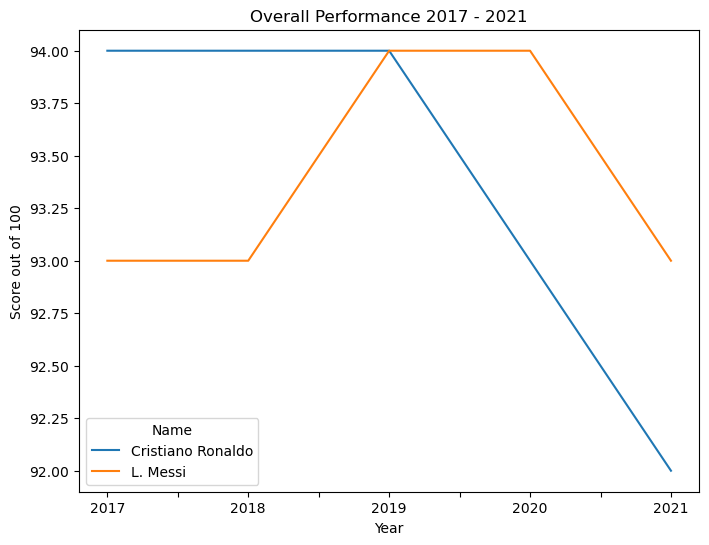

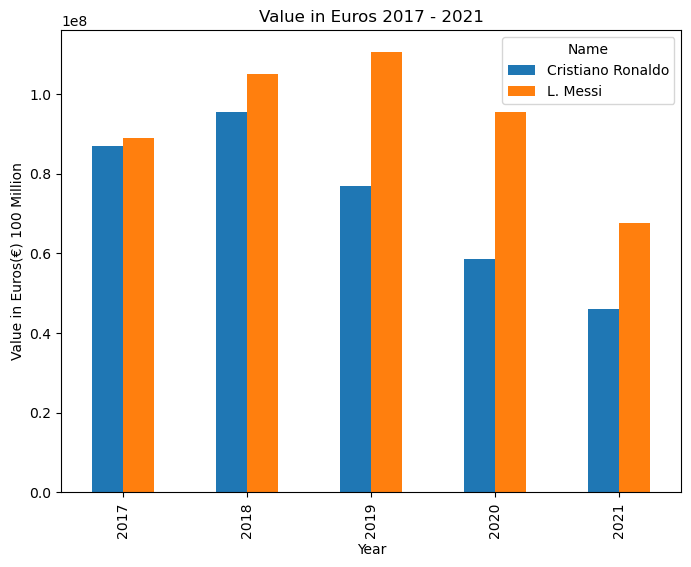

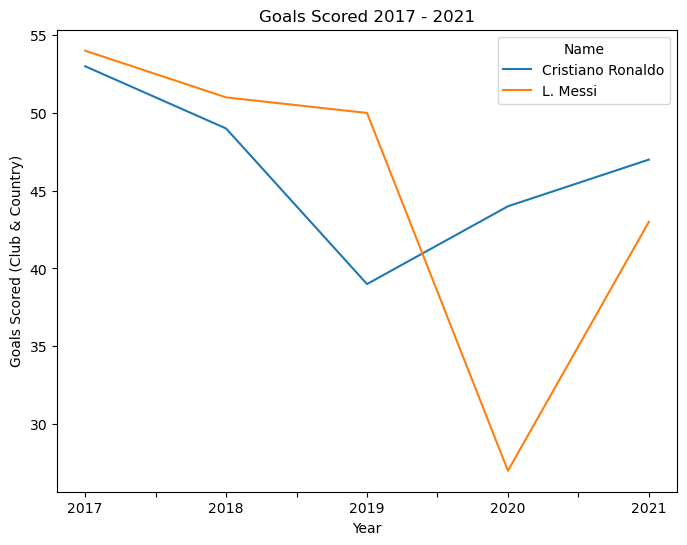

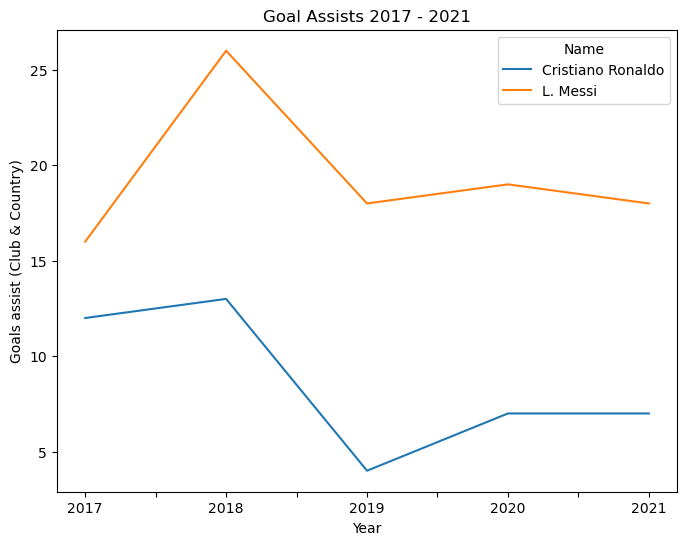

In [7]:
# Overall performance of Messi vs Ronaldo from 2017 to 2021
Overall_perform = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[5,42,79,116,153]])
Overall_perform.rename(columns = {"overall_2017":"2017",
                                  "overall_2018":"2018",
                                  "overall_2019":"2019",
                                  "overall_2020":"2020",
                                  "overall_2021":"2021",
                                 }, inplace = True)

Overall_perform = Overall_perform.T
Overall_plot = Overall_perform.plot(title = "Overall Performance 2017 - 2021", figsize = (8,6), layout="tight", xlabel ="Year", \
                                    ylabel = "Score out of 100")
print("Overall Peformance average")
print(Overall_perform.mean())
print("")


# Value in Euros from 2017 to 2021
Value_euros = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[7,44,81,118,155]])
Value_euros.rename(columns = {"value_eur_2017":"2017",
                                  "value_eur_2018":"2018",
                                  "value_eur_2019":"2019",
                                  "value_eur_2020":"2020",
                                  "value_eur_2021":"2021",
                                 }, inplace = True)

Value_euros = Value_euros.T
Value_euros_plot = Value_euros.plot.bar(title = "Value in Euros 2017 - 2021", figsize = (8,6), layout="tight", xlabel ="Year", \
                                        ylabel = "Value in Euros(€) 100 Million",)
print("Value in Euros average")
print(Value_euros.mean())
print("")


# Overall goals for club and country
Goals_scored = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[190,191,192,193,194]])
Goals_scored.rename(columns = {"goals_2017":"2017",
                               "goals_2018":"2018",
                               "goals_2019":"2019",
                               "goals_2020":"2020",
                               "goals_2021":"2021",
                                 }, inplace = True)

Goals_scored = Goals_scored.T
Goals_plot = Goals_scored.plot(title = "Goals Scored 2017 - 2021", figsize = (8,6), layout="tight", xlabel ="Year",
                                ylabel = "Goals Scored (Club & Country)")
print("Goals scored average")
print(Goals_scored.mean())
print("")


# Overall goal assists for club and country
Goal_asst = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[195,196,197,198,199]])
Goal_asst.rename(columns = {"goal_ast_2017":"2017",
                               "goal_ast_2018":"2018",
                               "goal_ast_2019":"2019",
                               "goal_ast_2020":"2020",
                               "goal_ast_2021":"2021",
                                 }, inplace = True)

Goal_asst = Goal_asst.T
Goal_asst_plot = Goal_asst.plot(title = "Goal Assists 2017 - 2021", figsize = (8,6),layout="tight", xlabel ="Year", 
                                ylabel = "Goals assist (Club & Country)")
print("Goal Assists average")
print(Goal_asst.mean())
print("")

plt.show()

# Key findings from the analysis
# 1) Messi has had the more consistent overall performance score when compared to Ronaldo however 
#    both have maintained the same average overall performance score over the period
# 
# 2) Messi has been the higher valued player throughout his career when compared to Ronaldo
# 
# 3) Ronaldo has scored more goals on average for the period compared to Messi although it is only a marginal difference 
# 
# 4) Messi has a significantly better goal assists average over the period compared to Ronaldo



2017 Stats Analysis
Name   Cristiano Ronaldo   L. Messi
count           6.000000   6.000000
mean           78.166667  74.666667
std            22.798392  26.755685
min            33.000000  26.000000
25%            80.250000  67.250000
50%            86.000000  87.500000
75%            91.750000  89.750000
max            92.000000  96.000000

2018 Stats Analysis
Name   Cristiano Ronaldo   L. Messi
count           6.000000   6.000000
mean           78.000000  74.666667
std            22.618576  26.755685
min            33.000000  26.000000
25%            80.500000  67.250000
50%            86.000000  87.500000
75%            90.000000  89.750000
max            93.000000  96.000000

2019 Stats Analysis
Name   Cristiano Ronaldo   L. Messi
count           6.000000   6.000000
mean           77.833333  76.000000
std            21.674101  24.795161
min            35.000000  32.000000
25%            79.500000  67.750000
50%            85.000000  88.000000
75%            89.750000  90.250000
ma

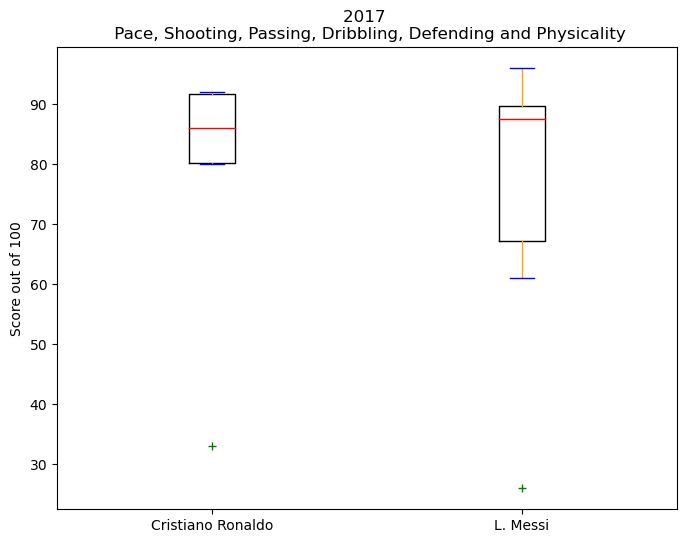

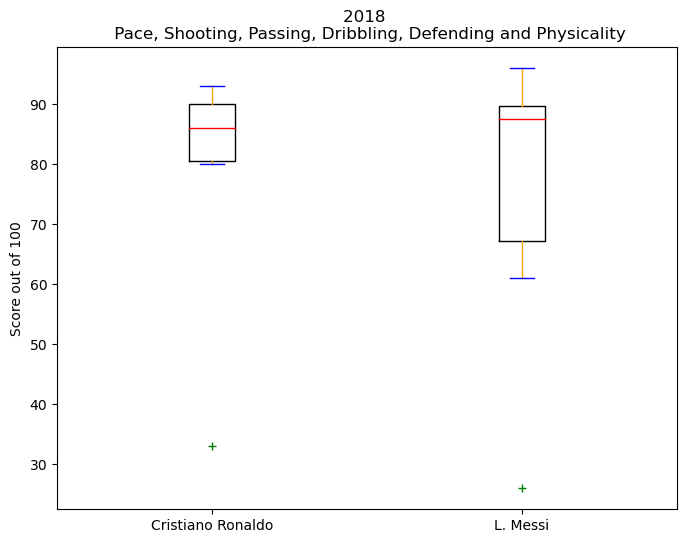

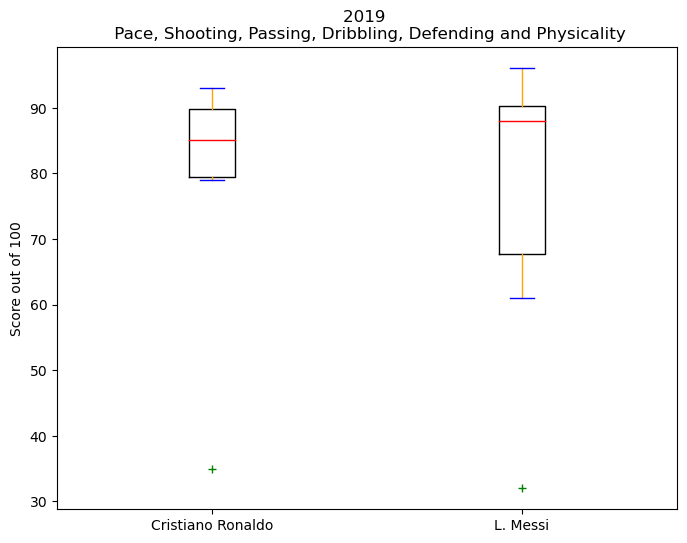

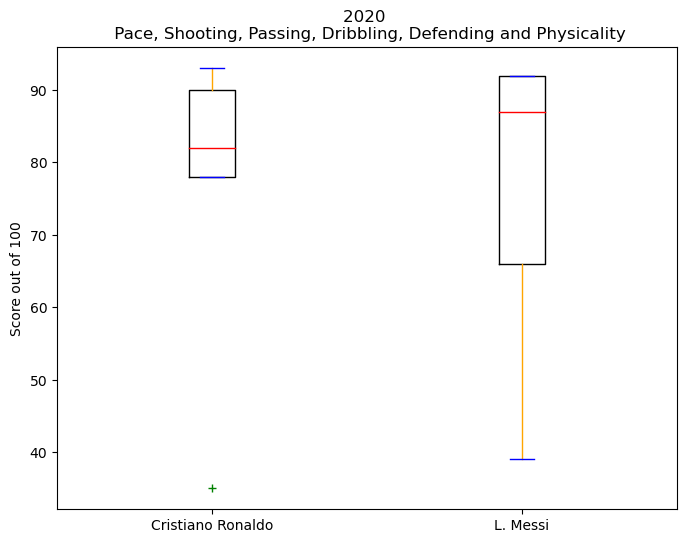

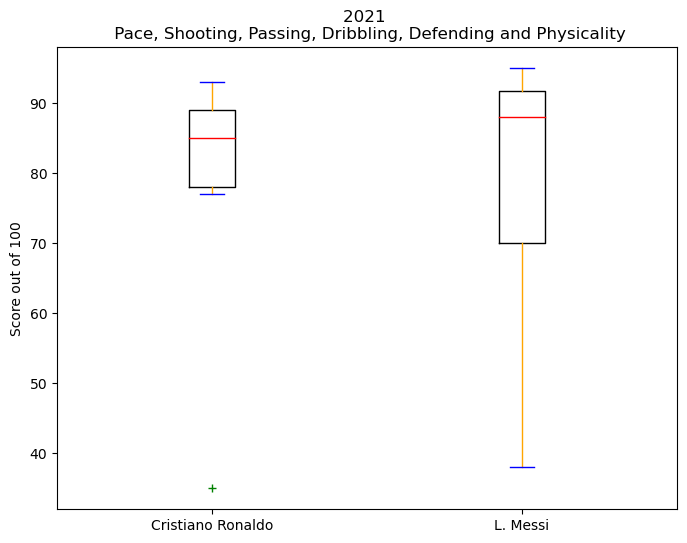

In [8]:
# Key perforance metrics by year for Messi vs Ronaldo between 2017 to 2021

# 2017
Performance_2017_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[8,9,10,11,12,13]])
Performance_2017_stats.rename(columns = {"pace_2017":"Pace",
                                         "shooting_2017":"Shooting",
                                         "passing_2017":"Passing",
                                         "dribbling_2017":"Dribbling",
                                         "defending_2017":"Defending",
                                         "physic_2017":"Physicality",       
                                        }, inplace = True)

Performance_2017_stats = Performance_2017_stats.T
print ("2017 Stats Analysis")
print(Performance_2017_stats.describe())
print ("")

# Setting the colour design for graphs
color = {
    "boxes": "black",
    "whiskers": "orange",
    "medians": "red",
    "caps": "blue",
        }

Performance_2017_stats.plot.box(title="2017 \n Pace, Shooting, Passing, Dribbling, Defending and Physicality", 
                                figsize = (8,6),layout="tight", color=color, sym="g+",
                                ylabel = "Score out of 100")

# 2018
Performance_2018_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[45,46,47,48,49,50]])
Performance_2018_stats.rename(columns = {"pace_2018":"Pace",
                                         "shooting_2018":"Shooting",
                                         "passing_2018":"Passing",
                                         "dribbling_2018":"Dribbling",
                                         "defending_2018":"Defending",
                                         "physic_2018":"Physicality",       
                                        }, inplace = True)

Performance_2018_stats = Performance_2018_stats.T
print ("2018 Stats Analysis")
print(Performance_2018_stats.describe())
print ("")
Performance_2018_stats.plot.box(title="2018 \n Pace, Shooting, Passing, Dribbling, Defending and Physicality", 
                                layout="tight", figsize = (8,6), color=color, sym="g+",
                                ylabel = "Score out of 100")


# 2019
Performance_2019_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[82,83,84,85,86,87]])
Performance_2019_stats.rename(columns = {"pace_2019":"Pace",
                                         "shooting_2019":"Shooting",
                                         "passing_2019":"Passing",
                                         "dribbling_2019":"Dribbling",
                                         "defending_2019":"Defending",
                                         "physic_2019":"Physicality",       
                                        }, inplace = True)

Performance_2019_stats = Performance_2019_stats.T
print ("2019 Stats Analysis")
print(Performance_2019_stats.describe())
print ("")
Performance_2019_stats.plot.box(title="2019 \n Pace, Shooting, Passing, Dribbling, Defending and Physicality", 
                                layout="tight", figsize = (8,6), color=color, sym="g+",
                                ylabel = "Score out of 100")


# 2020
Performance_2020_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[119,120,121,123,124]])
Performance_2020_stats.rename(columns = {"pace_2020":"Pace",
                                         "shooting_2020":"Shooting",
                                         "passing_2020":"Passing",
                                         "dribbling_2020":"Dribbling",
                                         "defending_2020":"Defending",
                                         "physic_2020":"Physicality",       
                                        }, inplace = True)

Performance_2020_stats = Performance_2020_stats.T
print ("2020 Stats Analysis")
print(Performance_2020_stats.describe())
print ("")
Performance_2020_stats.plot.box(title="2020 \n Pace, Shooting, Passing, Dribbling, Defending and Physicality", 
                                layout="tight", figsize = (8,6), color=color, sym="g+",
                                ylabel = "Score out of 100")


# 2021
Performance_2021_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[156,157,158,159,160,161]])
Performance_2021_stats.rename(columns = {"pace_2021":"Pace",
                                         "shooting_2021":"Shooting",
                                         "passing_2021":"Passing",
                                         "dribbling_2021":"Dribbling",
                                         "defending_2021":"Defending",
                                         "physic_2021":"Physicality",       
                                        }, inplace = True)


Performance_2021_stats = Performance_2021_stats.T
print ("2021 Stats Analysis")
print(Performance_2020_stats.describe())
print ("")
Performance_2021_stats.plot.box(title="2021 \n Pace, Shooting, Passing, Dribbling, Defending and Physicality",
                                layout="tight", figsize = (8,6), color=color, sym="g+",
                                ylabel = "Score out of 100")

plt.show()

# Key findings from the analysis
# 5) Over the period both Ronaldo and Messi have performed similar across the Key Performance Metrics of
#    Pace, Shooting, Dribbling, Defending and Physicality\
# 
# 6) The data suggests that over the period Ronaldo has performed more consistently across the Key Performance Metrics
#    with less variations between his lower and upper quartiles when compared to Messi however Messi has the 
#    higher Median score across the years
# 
# 7) Over the periods Defending have been each players’ weakest point and forms the outliers in the data 
#    - this will be removed from the analysis going forward




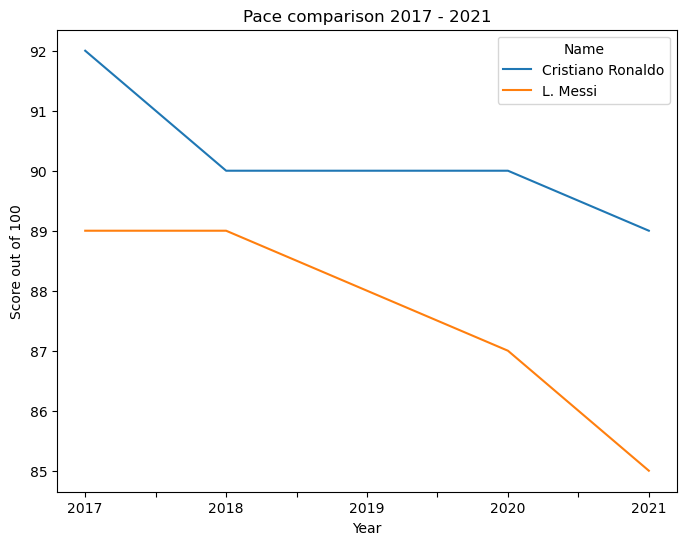

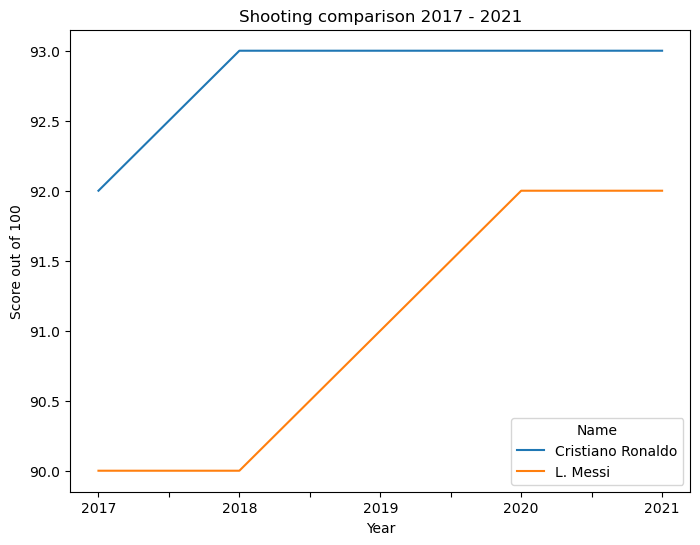

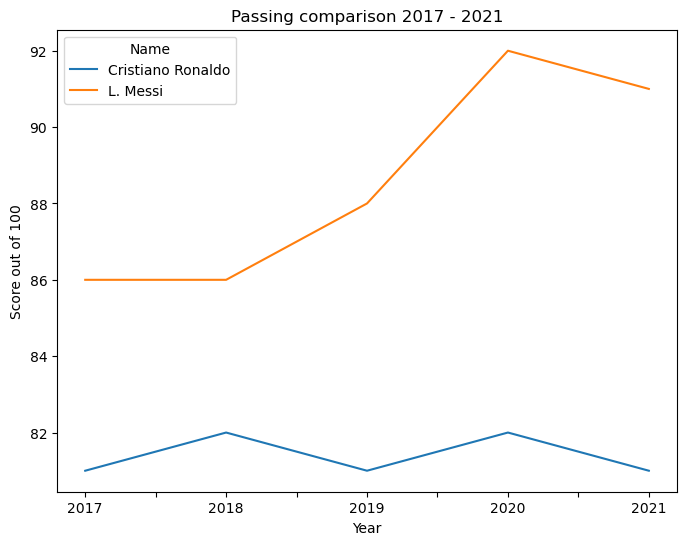

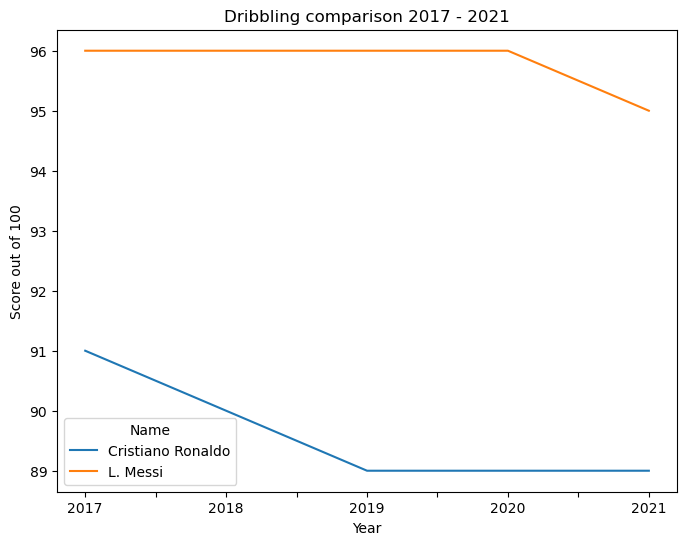

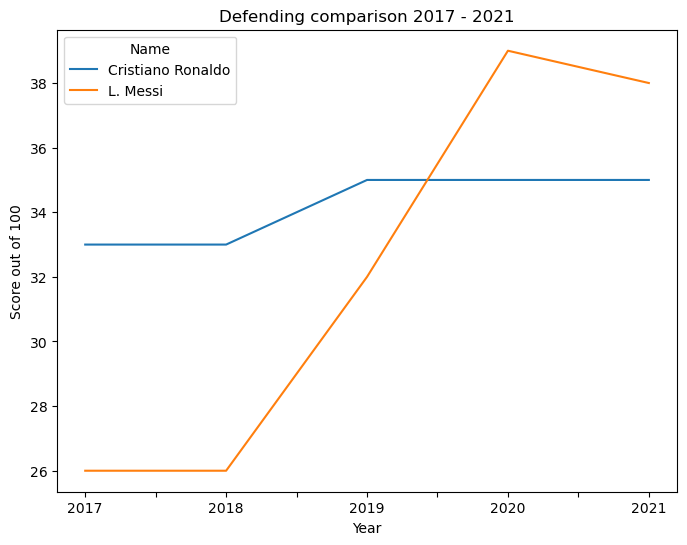

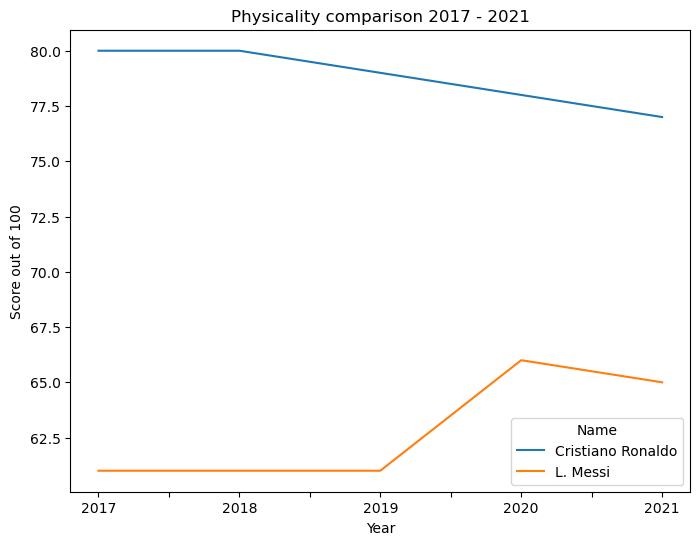

In [9]:
# Key perforance metrics by skill for Messi vs Ronaldo between 2017 to 2021

# Pace
Pace_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[8,45,82,119,156]])
Pace_stats.rename(columns = {"pace_2017":"2017",
                             "pace_2018":"2018",
                             "pace_2019":"2019",
                             "pace_2020":"2020",
                             "pace_2021":"2021",
                             }, inplace = True)

Pace_stats = Pace_stats.T
Pace_plot = Pace_stats.plot(title="Pace comparison 2017 - 2021",figsize = (8,6), layout="tight", xlabel ="Year", \
                                    ylabel = "Score out of 100")


# Shooting
Shooting_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[9,46,83,120,157]])
Shooting_stats.rename(columns = {"shooting_2017":"2017",
                                 "shooting_2018":"2018",
                                 "shooting_2019":"2019",
                                 "shooting_2020":"2020",
                                 "shooting_2021":"2021",
                                 }, inplace = True)

Shooting_stats = Shooting_stats.T
Shoot_plot = Shooting_stats.plot(title="Shooting comparison 2017 - 2021", figsize = (8,6), layout="tight", xlabel ="Year", \
                                    ylabel = "Score out of 100")


# Passing
Passing_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[10,47,84,121,158]])
Passing_stats.rename(columns = {"passing_2017":"2017",
                                "passing_2018":"2018",
                                "passing_2019":"2019",
                                "passing_2020":"2020",
                                "passing_2021":"2021",
                                }, inplace = True)

Passing_stats = Passing_stats.T
Pass_plot = Passing_stats.plot(title="Passing comparison 2017 - 2021",figsize = (8,6), layout="tight", xlabel ="Year", \
                                    ylabel = "Score out of 100")


# Dribbling
Dribbling_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[11,48,85,122,159]])
Dribbling_stats.rename(columns = {"dribbling_2017":"2017",
                                  "dribbling_2018":"2018",
                                  "dribbling_2019":"2019",
                                  "dribbling_2020":"2020",
                                  "dribbling_2021":"2021",
                                  }, inplace = True)

Dribbling_stats = Dribbling_stats.T
Drib_plot = Dribbling_stats.plot(title="Dribbling comparison 2017 - 2021",figsize = (8,6), layout="tight", xlabel ="Year", \
                                    ylabel = "Score out of 100")


# Defending
Defending_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[12,49,86,123,160]])
Defending_stats.rename(columns = {"defending_2017":"2017",
                                  "defending_2018":"2018",
                                  "defending_2019":"2019",
                                  "defending_2020":"2020",
                                  "defending_2021":"2021",
                                  }, inplace = True)

Defending_stats = Defending_stats.T
Defend_plot = Defending_stats.plot(title="Defending comparison 2017 - 2021",figsize = (8,6), layout="tight", xlabel ="Year", \
                                    ylabel = "Score out of 100")


# Physicality
Physical_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[13,50,87,124,161]])
Physical_stats.rename(columns = {"physic_2017":"2017",
                                 "physic_2018":"2018",
                                 "physic_2019":"2019",
                                 "physic_2020":"2020",
                                 "physic_2021":"2021",
                                 }, inplace = True)

Physical_stats = Physical_stats.T
Phy_plot = Physical_stats.plot(title="Physicality comparison 2017 - 2021", figsize = (8,6), layout="tight", xlabel ="Year", \
                                    ylabel = "Score out of 100")


plt.show()

# Key findings from the analysis
# 8) The data suggests that both Messi and Ronaldo have areas within the metrics where they are the top performer 
#    over the period:
#         * Messi performs best over time in: Passing, Dribbling
#         * Ronaldo performs best over time in: Pace, Shooting, Physicality

# 9) The skills that have changed the most overtime over for each player
#         * Improvement 
#             * Messi - Passing and Defending where Messi overtook Ronaldo was in Defending
#         * Reduction
#             * Messi and Ronaldo - Pace has reduced but that is to be expected considering they are aging 5 years in the data
# 
# 10) As identified in the previous analysis, the data suggests that Ronaldo is more consistent over the period in the metrics
#     however the analysis identifies that Messi has found areas of marked improvement




Attack Analysis
Name   Cristiano Ronaldo   L. Messi
count          25.000000  25.000000
mean           87.240000  84.480000
std             4.205948   8.916838
min            81.000000  70.000000
25%            84.000000  77.000000
50%            87.000000  88.000000
75%            89.000000  91.000000
max            95.000000  95.000000

Skill Analysis
Name   Cristiano Ronaldo   L. Messi
count          25.000000  25.000000
mean           83.120000  93.000000
std             7.160773   3.378856
min            72.000000  87.000000
25%            77.000000  90.000000
50%            81.000000  94.000000
75%            91.000000  96.000000
max            94.000000  97.000000

Movement Analysis
Name   Cristiano Ronaldo  L. Messi
count          25.000000      25.0
mean           86.320000      91.4
std            10.123076       4.0
min            63.000000      80.0
25%            87.000000      90.0
50%            89.000000      92.0
75%            91.000000      95.0
max            96.000

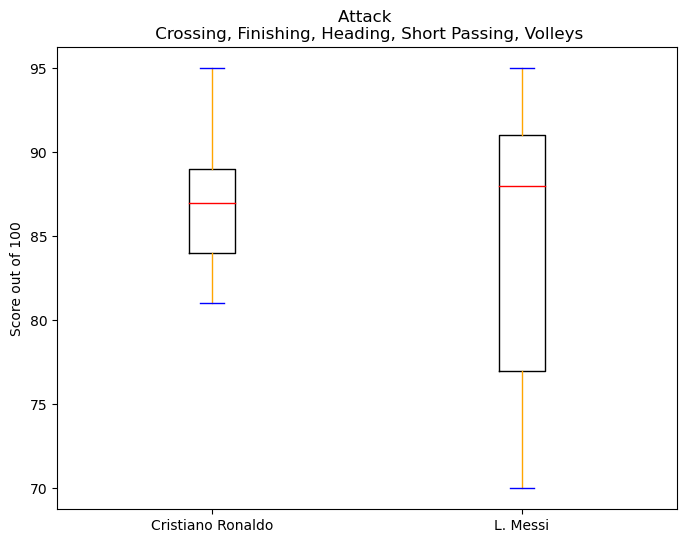

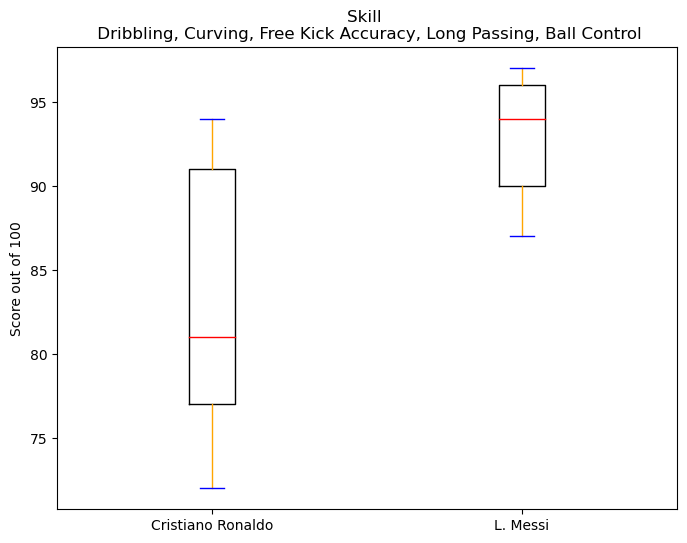

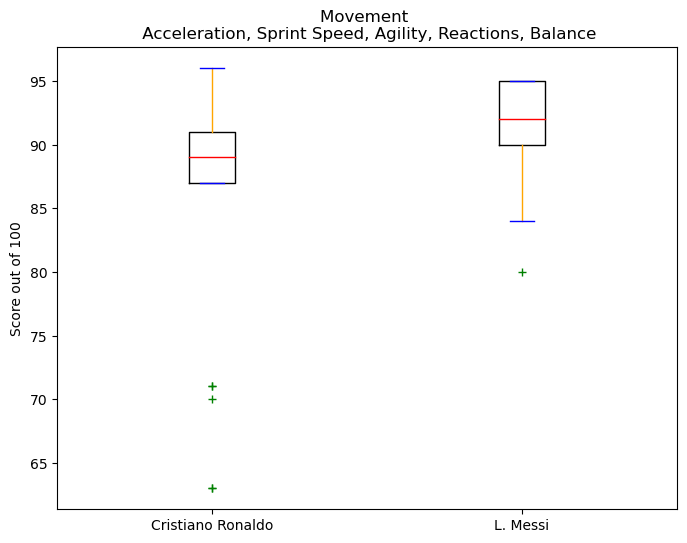

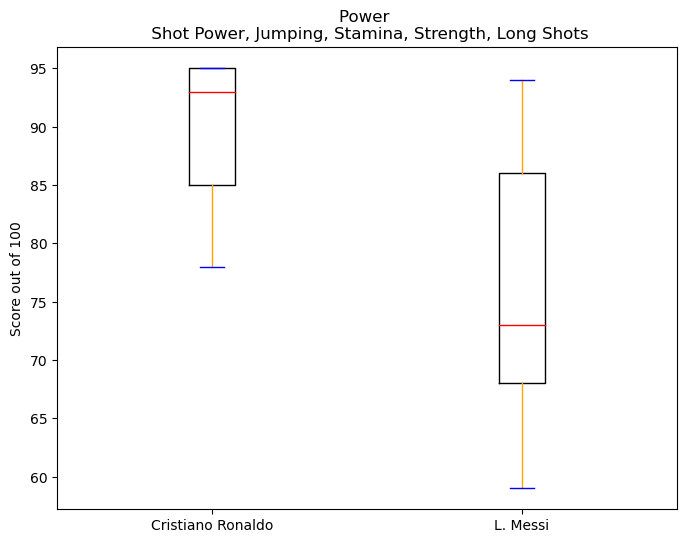

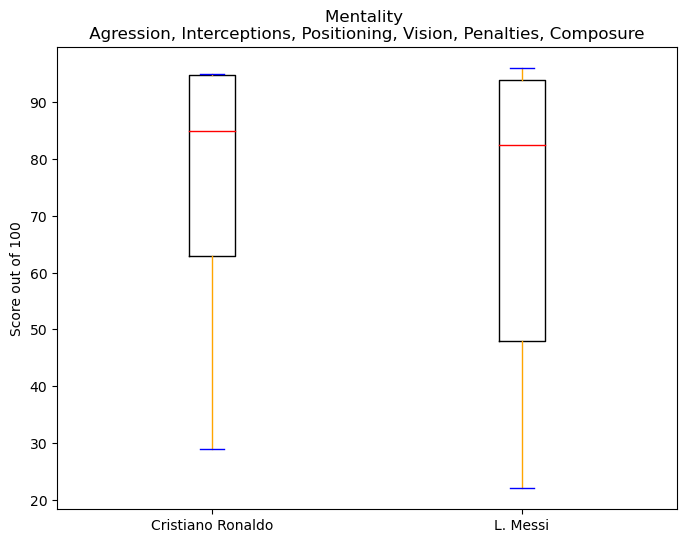

In [10]:
# Ronaldo and Messi stats across 4 key attributes between 2017 to 2021

# Attack
Attack_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[14,15,16,17,18, \
                                                             51,52,53,54,55, \
                                                             88,89,90,91,92, \
                                                             125,126,127,128,129, \
                                                             162,163,164,165,166  
                                                            ]])


Attack_stats = Attack_stats.T

color = {
    "boxes": "black",
    "whiskers": "orange",
    "medians": "red",
    "caps": "blue",
        }


Attack_plot = Attack_stats.plot.box(title="Attack \n Crossing, Finishing, Heading, Short Passing, Volleys", 
                      figsize = (8,6),layout="tight", color=color, sym="g+",
                                ylabel = "Score out of 100")
print ("Attack Analysis")
print(Attack_stats.describe())
print ("")




# Skill
Skill_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[19,20,21,22,23, \
                                                            56,57,58,59,60, \
                                                            93,94,95,96,97, \
                                                            130,131,132,133,134, \
                                                            167,168,169,170,171 
                                                            ]])


Skill_stats = Skill_stats.T
SKill_plot = Skill_stats.plot.box(title="Skill \n Dribbling, Curving, Free Kick Accuracy, Long Passing, Ball Control", 
                     figsize = (8,6),layout="tight", color=color, sym="g+",
                                ylabel = "Score out of 100")

print ("Skill Analysis")
print(Skill_stats.describe())
print ("")



# Movement
Movement_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[24,25,26,27,28, \
                                                               61,62,63,64,65, \
                                                               98,99,100,101,102, \
                                                               135,136,137,138,139, \
                                                               172,173,174,175,176
                                                               ]])


Movement_stats = Movement_stats.T
Movement_plot = Movement_stats.plot.box(title="Movement \n Acceleration, Sprint Speed, Agility, Reactions, Balance", figsize = (8,6),layout="tight", color=color, sym="g+",
                                ylabel = "Score out of 100")

print ("Movement Analysis")
print(Movement_stats.describe())
print ("")


# Power
Power_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[29,30,31,32,33, \
                                                            66,67,68,69,70, \
                                                            103,104,105,106,107, \
                                                            140,141,142,143,144, \
                                                            177,178,179,180,181
                                                            ]])


Power_stats = Power_stats.T
Power_plot = Power_stats.plot.box(title="Power \n Shot Power, Jumping, Stamina, Strength, Long Shots", figsize = (8,6),layout="tight", color=color, sym="g+",
                                ylabel = "Score out of 100")

print ("Power Analysis")
print(Power_stats.describe())
print ("")

# Mentality
Mental_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[:,[34,35,36,37,38,39, \
                                                             71,72,73,74,75, 76,
                                                             108,109,110,111,112,113, \
                                                             145,146,147,148,149,150, \
                                                             182,183,184,185,186,187,
                                                             ]])


Mental_stats = Mental_stats.T
Mental_plot = Mental_stats.plot.box(title="Mentality \n Agression, Interceptions, Positioning, Vision, Penalties, Composure ", figsize = (8,6),layout="tight", color=color, sym="g+",
                                ylabel = "Score out of 100")

print ("Mentality Analysis")
print(Power_stats.describe())
print ("")

plt.show()

# Key findings from the analysis
# 11) The data suggests that both Messi and Ronaldo have attributes where they are the better performer 
#     over the period and that they have similar average score to each other across the attributes over the period:
#     *  The attributes that Ronaldo to have remained more consistent over the period are Attack, Movement, Power 
#        and Mentality with less variation between first and third quartile of data
#     *  Messi's attributes where his more consistent with less variation is Skill
# 
# 12) It is observed that both players have very similar median scores on Attack, Movement^ and Mentality, however
#     it is observed that Ronaldo significantly outperforms Messi in the Power attribute whereas Messi significantly outperforms
#     Ronaldo in the Skill attribute. 
#    
# 
# ^Movement - see next section for outlier analysis



In [41]:
#Printing the dataframes and identiying outliers

# Attack - no outliers for either player

# Skill - # no outliers for either player

# Movement
print(Movement_stats)
# Outliers 
#  *Ronaldo = Balance 2018, 2020,2021 
#  *Messi = Sprint Speed 2021

# Power - no outliers for either player

# Mental - no outliers for either player


Name                        Cristiano Ronaldo  L. Messi
movement_acceleration_2017                 91        92
movement_sprint_speed_2017                 92        87
movement_agility_2017                      90        90
movement_reactions_2017                    96        95
movement_balance_2017                      63        95
movement_acceleration_2018                 89        92
movement_sprint_speed_2018                 91        87
movement_agility_2018                      89        90
movement_reactions_2018                    96        95
movement_balance_2018                      63        95
movement_acceleration_2019                 89        91
movement_sprint_speed_2019                 91        86
movement_agility_2019                      87        91
movement_reactions_2019                    96        95
movement_balance_2019                      70        95
movement_acceleration_2020                 89        91
movement_sprint_speed_2020                 91   

In [11]:
# Hypothesis Testing:
# * Null Hypothesis - Based on the data, One player is better than the other 
#                                                               i.e. Ronaldo is a better player than Messi or vice versa
# * Alt Hypothesis - Based on the data, both players are equally good with better relative scores in different attributes
# * ANOVA: Are there any signficant statiscal differences in the the mean across the 4 key attributes data between 2017 to 2021


# Attack
Ron_Attack_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[[0],[14,15,16,17,18, \
                                                                   51,52,53,54,55, \
                                                                   88,89,90,91,92, \
                                                                   125,126,127,128,129, \
                                                                   162,163,164,165,166  
                                                            ]])

Ron_Attack_stats = Ron_Attack_stats.T

Mes_Attack_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[[1],[14,15,16,17,18, \
                                                                   51,52,53,54,55, \
                                                                   88,89,90,91,92, \
                                                                   125,126,127,128,129, \
                                                                   162,163,164,165,166  
                                                            ]])

Mes_Attack_stats = Mes_Attack_stats.T


# Skill
Ron_Skill_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[[0],[19,20,21,22,23, \
                                                                  56,57,58,59,60, \
                                                                  93,94,95,96,97, \
                                                                  130,131,132,133,134, \
                                                                  167,168,169,170,171 
                                                            ]])

Ron_Skill_stats = Ron_Skill_stats.T

Mes_Skill_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[[1],[19,20,21,22,23, \
                                                                  56,57,58,59,60, \
                                                                  93,94,95,96,97, \
                                                                  130,131,132,133,134, \
                                                                  167,168,169,170,171 
                                                            ]])


Mes_Skill_stats = Mes_Skill_stats.T


# Movement
Ron_Movement_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[[0],[24,25,26,27,28, \
                                                                     61,62,63,64,65, \
                                                                     98,99,100,101,102, \
                                                                     135,136,137,138,139, \
                                                                     172,173,174,175,176
                                                               ]])

Ron_Movement_stats = Ron_Movement_stats.T

Mes_Movement_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[[1],[24,25,26,27,28, \
                                                                     61,62,63,64,65, \
                                                                     98,99,100,101,102, \
                                                                     135,136,137,138,139, \
                                                                     172,173,174,175,176
                                                               ]])

Mes_Movement_stats = Mes_Movement_stats.T


# Power
Ron_Power_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[[0],[29,30,31,32,33, \
                                                                  66,67,68,69,70, \
                                                                  103,104,105,106,107, \
                                                                  140,141,142,143,144, \
                                                                  177,178,179,180,181
                                                            ]])

Ron_Power_stats = Ron_Power_stats.T

Mes_Power_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[[1],[29,30,31,32,33, \
                                                                  66,67,68,69,70, \
                                                                  103,104,105,106,107, \
                                                                  140,141,142,143,144, \
                                                                  177,178,179,180,181
                                                            ]])

Mes_Power_stats = Mes_Power_stats.T


# Mentality
Ron_Mental_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[[0],[34,35,36,37,38, \
                                                                   71,72,73,74,75,
                                                                   108,109,110,111,112, \
                                                                   145,146,147,148,149, \
                                                                   182,183,184,185,186,
                                                             ]])

Ron_Mental_stats = Ron_Mental_stats.T

Mes_Mental_stats = pd.DataFrame(combined_Mes_Ron_data_df.iloc[[1],[34,35,36,37,38, \
                                                                   71,72,73,74,75,
                                                                   108,109,110,111,112, \
                                                                   145,146,147,148,149, \
                                                                   182,183,184,185,186,
                                                             ]])

Mes_Mental_stats = Mes_Mental_stats.T

print("Hypothesis Testing p-value")
print(st.f_oneway(Ron_Attack_stats, Mes_Attack_stats, Ron_Skill_stats, Mes_Skill_stats, \
                  Ron_Movement_stats, Mes_Movement_stats, Ron_Power_stats, Mes_Power_stats, Ron_Mental_stats, Mes_Mental_stats \
                 ))

# The p-_value is less that 0.05 threshold providing an for an small probablity of being wrong thus provding an acceptable risk
# of a false psotive occuring thus we the Null Hypothesis can be rejected.

Hypothesis Testing p-value
F_onewayResult(statistic=array([11.15361954]), pvalue=array([1.59707075e-14]))


### Conclusion

It is a topic that has been widely debated for a long time on who the GOAT is between Messi and Ronaldo. 

The analysis undertaken is limited as it only assesses the two players over the period from 2017 to 2021 but having said that, the data suggests there are clear distinctions identified between the two players that someone can use to make the case that one player is better than the other... 

However, it is my position that over this period both have been excellent players with no clear-cut determination on who the best player is:

 * Both players have remarkably similar attributes with Messi being a more skilled player and Ronaldo a more power-based player. 

 * Both players have remained consistent in key metrics with Messi improving in certain areas whilst Ronaldo outperforms Messi in more areas.

 * Both players score a lot of goals for their country and clubs with Ronaldo scoring slightly more on average over the period.

 * The only area where Messi has the edge is on Goal Assists where he significantly outperforms Ronaldo.
 
The challenge with concluding on who the better player is that whilst data and stats can tell a story, soccer is not a game played on paper and so other attributes that cannot be measured play a significant role. 

As it was noted in the analysis, Messi has always been the higher value player. A person can potentially conclude that over time Messi has been the more valued/(better?) player because it is more than just his skill that he brings to the team that makes him so valuable. An example of this could be his relative performance on goal assists which could indicate his focus is on ensuring his team performs well vs his individual record. But can money determine who the better player is?

Fundamentally the debate will continue for a long time and will only really be decided by the passage of time and the future performances of both players.
